# Parity of Stock Prices: Data Exploration

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import ecombine as ec
ec.set_theme()

In [2]:
START_DATE = '2014-01-01'
END_DATE = '2025-01-01'

START_YEAR = datetime.datetime.strptime(START_DATE, '%Y-%m-%d').year
END_YEAR = datetime.datetime.strptime(END_DATE, '%Y-%m-%d').year

SAVE_DIR = f'./data/stock_parity_{START_YEAR}_{END_YEAR}/'
os.makedirs(SAVE_DIR, exist_ok=True)

In [3]:
# Define the list of stock tickers
stock_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'TSLA', 
    # nike
    'NKE',
    # s&p 500
    '^GSPC',
    # 10 year treasury bond
    '^TNX',
    ]
# exchange rates
fx_tickers = [    
    'USDEUR=X', 'USDJPY=X', 'USDCNY=X',
]

# Download the data for the past 5 years
stock_data = yf.download(stock_tickers, start=START_DATE, end=END_DATE)['Close']
fx_data = yf.download(fx_tickers, start=START_DATE, end=END_DATE)['Close']

stock_data

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT,NKE,NVDA,TSLA,^GSPC,^TNX
Date,,,,,,,,
2014-01-02,17.234293,27.755241,31.120729,34.451031,0.373966,10.006667,1831.979980,2.985
2014-01-03,16.855736,27.552771,30.911377,34.358566,0.369486,9.970667,1831.369995,2.995
2014-01-06,16.947647,27.859966,30.258133,34.094357,0.374438,9.800000,1826.770020,2.961
2014-01-07,16.826447,28.397058,30.492620,34.120789,0.380568,9.957333,1837.880005,2.937
2014-01-08,16.933004,28.456154,29.948271,33.944649,0.385756,10.085333,1837.489990,2.993
...,...,...,...,...,...,...,...,...
2024-12-20,254.490005,191.410004,436.600006,76.940002,134.699997,421.059998,5930.850098,4.524
2024-12-23,255.270004,194.630005,435.250000,76.760002,139.669998,430.600006,5974.069824,4.599
2024-12-24,258.200012,196.110001,439.329987,76.790001,140.220001,462.279999,6040.040039,4.591


In [4]:
# def compute_log_returns_and_parity(data, ticker, save_dir=None):
#     """Compute log(Y_t/Y_{t-1}) and its sign for a ticker.
     
#     Return a data frame for that ticker, including the original price.
    
#     Column names: Price, LogReturns, Parity (1 if non-negative, 0 if negative)
#     """

#     # Compute the log returns
#     log_returns = np.log(data[ticker] / data[ticker].shift(1))
    
#     # Compute the parity (first entry is NaN)
#     parity = (log_returns >= 0)
#     parity.iloc[0] = np.nan

#     # Create a data frame
#     df = pd.DataFrame({
#         'Price': data[ticker],
#         'LogReturns': log_returns,
#         'Parity': parity
#     })

#     if save_dir is not None:
#         df.to_csv(os.path.join(save_dir, f'{ticker}.csv'))
    
#     return df


# def plot_log_returns_and_parity(ticker_data, ticker_name=None, save_dir=None):
#     """Plot the log-returns and use the marker color to indicate the parity.
    
#     Note that first entry is NaN.
#     """
#     if ticker_name is None:
#         ticker_name = ticker_data.columns[0]
    
#     fig, ax = plt.subplots(1, 1, figsize=(16, 5))
#     ax.plot(ticker_data['LogReturns'], marker='.', linestyle='-', color='gray', alpha=0.7)
#     ax.scatter(ticker_data.index, ticker_data['LogReturns'], c=ticker_data['Parity'], cmap='coolwarm', s=20, alpha=0.9)
#     ax.set_title(f'Log-Returns and Parity: {ticker_name}')
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Log-Returns')
#     ax.axhline(0, color='black', linestyle='--', linewidth=1)
#     plt.show()

#     if save_dir is not None:
#         fig.savefig(os.path.join(save_dir, f'{ticker_name}.png', dpi=350))
#         fig.savefig(os.path.join(save_dir, f'{ticker_name}.pdf'))

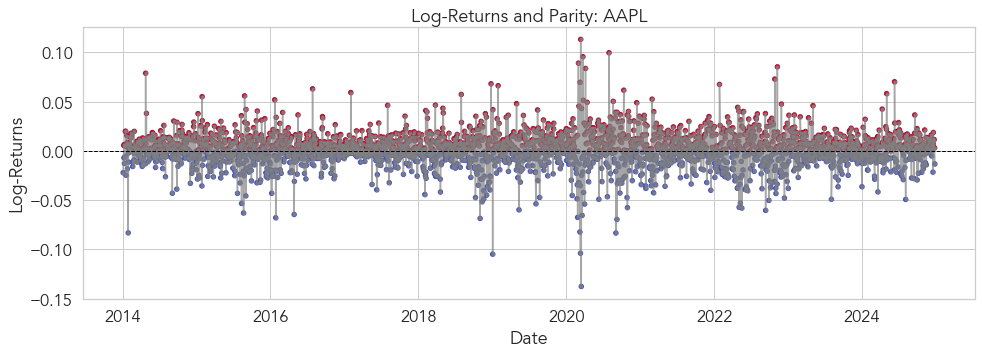

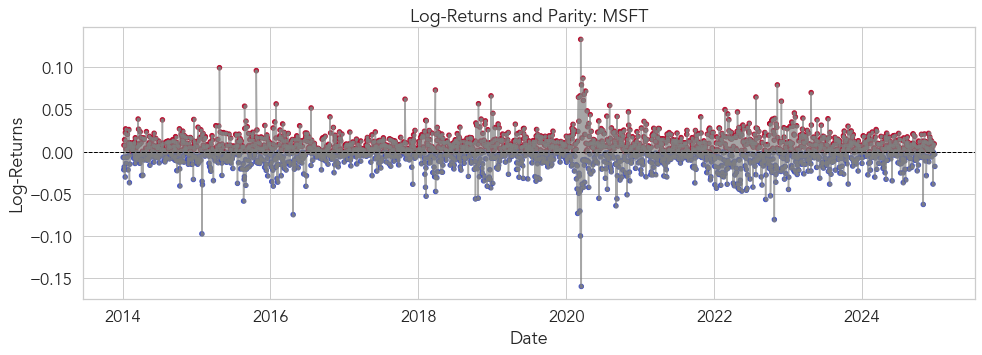

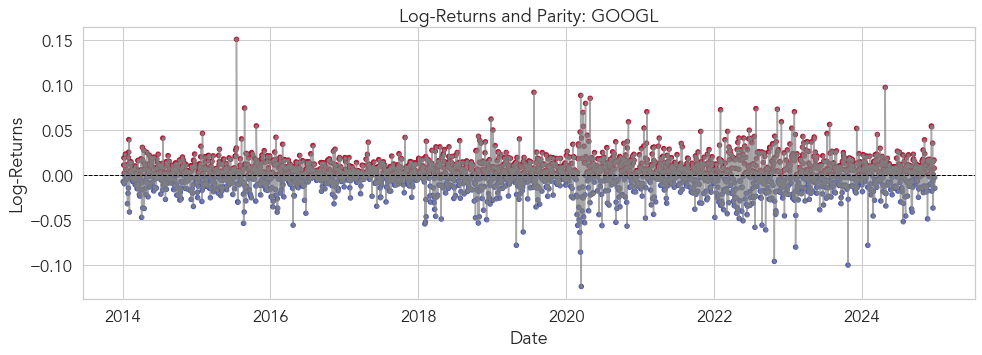

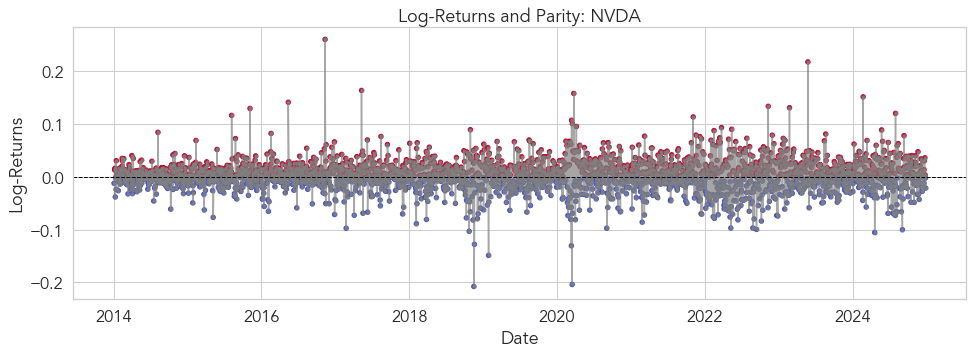

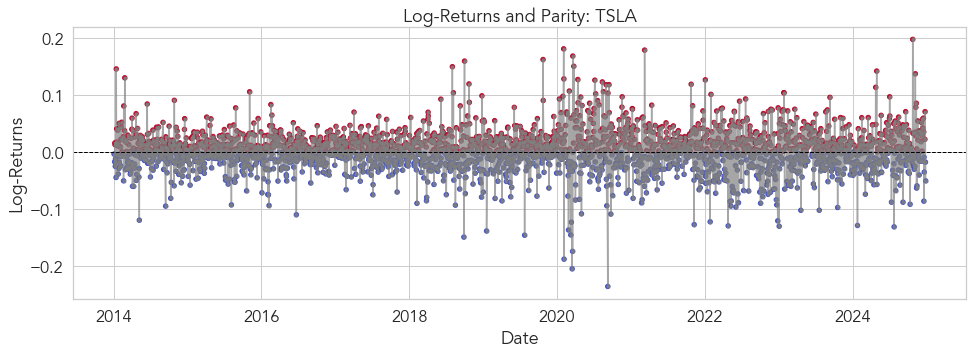

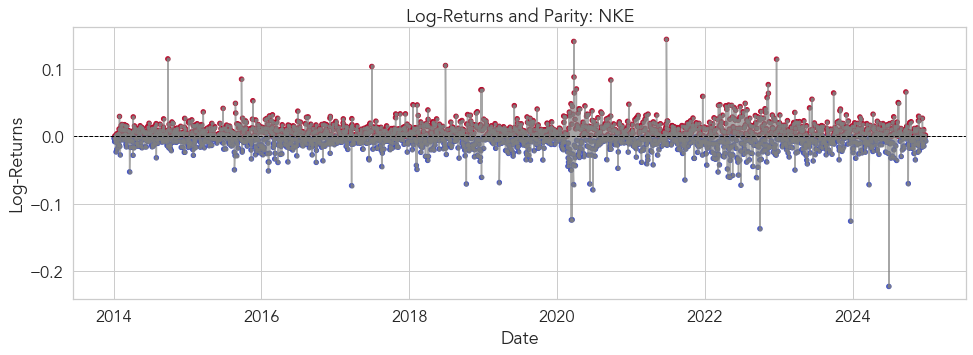

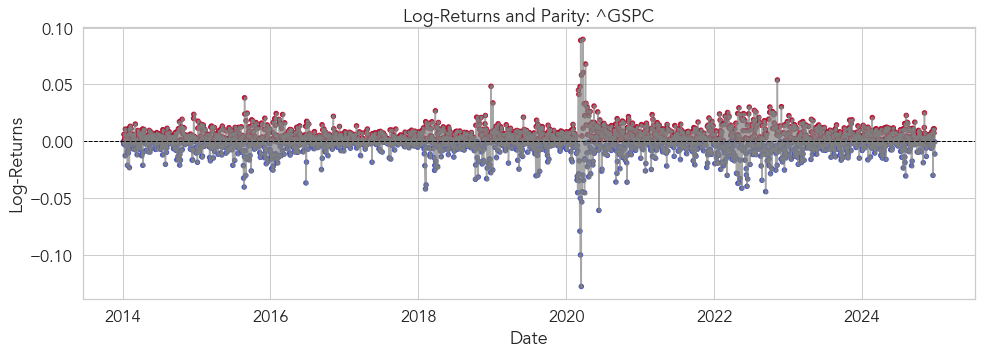

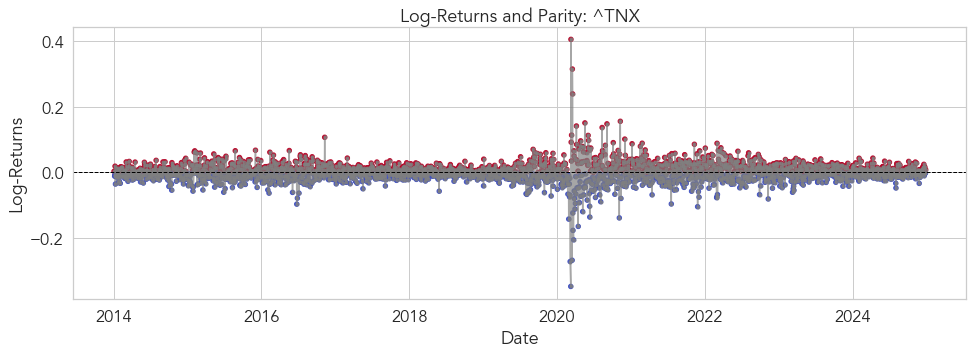

In [5]:
for ticker in stock_tickers:
    ticker_data = ec.data.stock_parity.compute_log_returns_and_parity(ticker, data=stock_data, save_dir=SAVE_DIR)
    ec.data.stock_parity.plot_log_returns_and_parity(ticker_data, ticker_name=ticker)

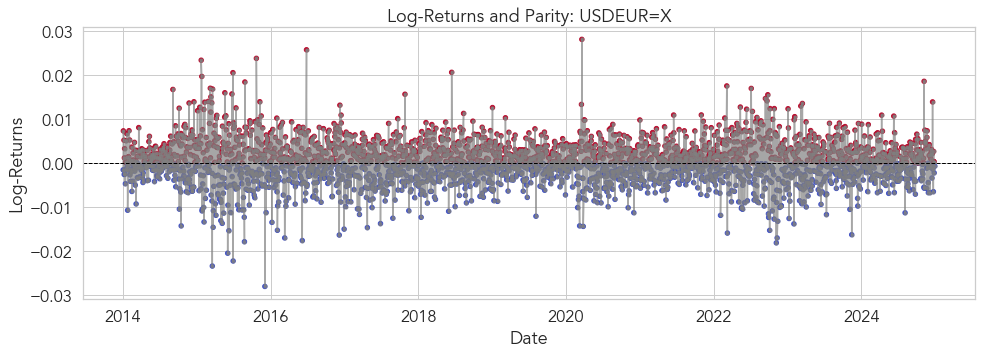

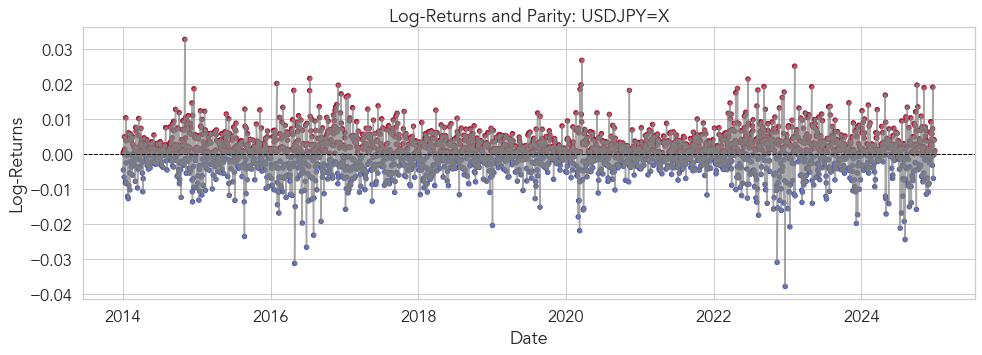

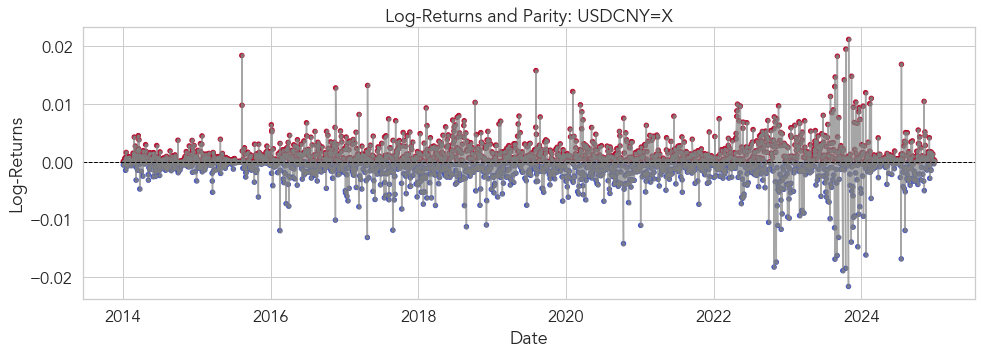

In [6]:
for ticker in fx_tickers:
    ticker_data = ec.data.stock_parity.compute_log_returns_and_parity(ticker, data=fx_data, save_dir=SAVE_DIR)
    ec.data.stock_parity.plot_log_returns_and_parity(ticker_data, ticker_name=ticker)